<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/car_data_multivarit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Set up 

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os

In [26]:
cd '/content/drive/MyDrive/mashine_learning_models/car price'

/content/drive/MyDrive/mashine_learning_models/car price


In [27]:
car_data=pd.read_csv('CarPrice_Assignment.csv')

In [28]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##Data Processing

In [30]:
print(f'{car_data.fueltype.unique()}')
print(f'{car_data.symboling.unique()}')

print(f'{car_data.doornumber.unique()}')
print(f'{car_data.carbody.unique()}')
print(f'{car_data.drivewheel.unique()}')
print(f'{car_data.enginetype.unique()}')
# print(f'{car_data.fueltype.unique()}')






['gas' 'diesel']
[ 3  1  2  0 -1 -2]
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [31]:
car_data['fueltype']=car_data['fueltype'].apply({'gas':1,'diesel':2}.get)
car_data['doornumber']=car_data['doornumber'].apply({'two':1,'four':2}.get)
car_data['carbody']=car_data['carbody'].apply({'convertible':1,'hatchback':2, 'sedan':3,'wegon':4,'hardtop':5}.get)
car_data['drivewheel']=car_data['drivewheel'].apply({'rwd':1,'fwd':2,'4wd':3}.get)
car_data['enginetype']=car_data['enginetype'].apply({'dohc':1,'ohcv':2, 'ohc':3,'l':4,'rotor':5,'ohcf':6,'dohcv':7}.get)

In [32]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,1,1.0,1,front,88.6,168.8,64.1,48.8,2548,1,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,1,1.0,1,front,88.6,168.8,64.1,48.8,2548,1,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,1,2.0,1,front,94.5,171.2,65.5,52.4,2823,2,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,2,3.0,2,front,99.8,176.6,66.2,54.3,2337,3,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,2,3.0,3,front,99.4,176.6,66.4,54.3,2824,3,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [34]:
car_data=car_data[[ 'fueltype', 
       'doornumber', 'carbody', 'drivewheel',  'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
        'enginesize',  'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [35]:
car_data.head()

,fueltype,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,1.0,1,88.6,168.8,64.1,48.8,2548,1,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,1.0,1,88.6,168.8,64.1,48.8,2548,1,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,2.0,1,94.5,171.2,65.5,52.4,2823,2,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,2,3.0,2,99.8,176.6,66.2,54.3,2337,3,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,2,3.0,3,99.4,176.6,66.4,54.3,2824,3,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
car_data.fillna(0, inplace=True)

##Data Visualization

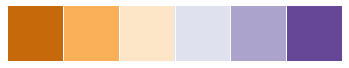

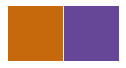

In [37]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) 
pal = sns.color_palette('PuOr', 6) 
pal.as_hex() 

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors)  
sns.palplot(sns.color_palette(sns_colors)) 

In [38]:
car_data.columns

Index(['fueltype', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

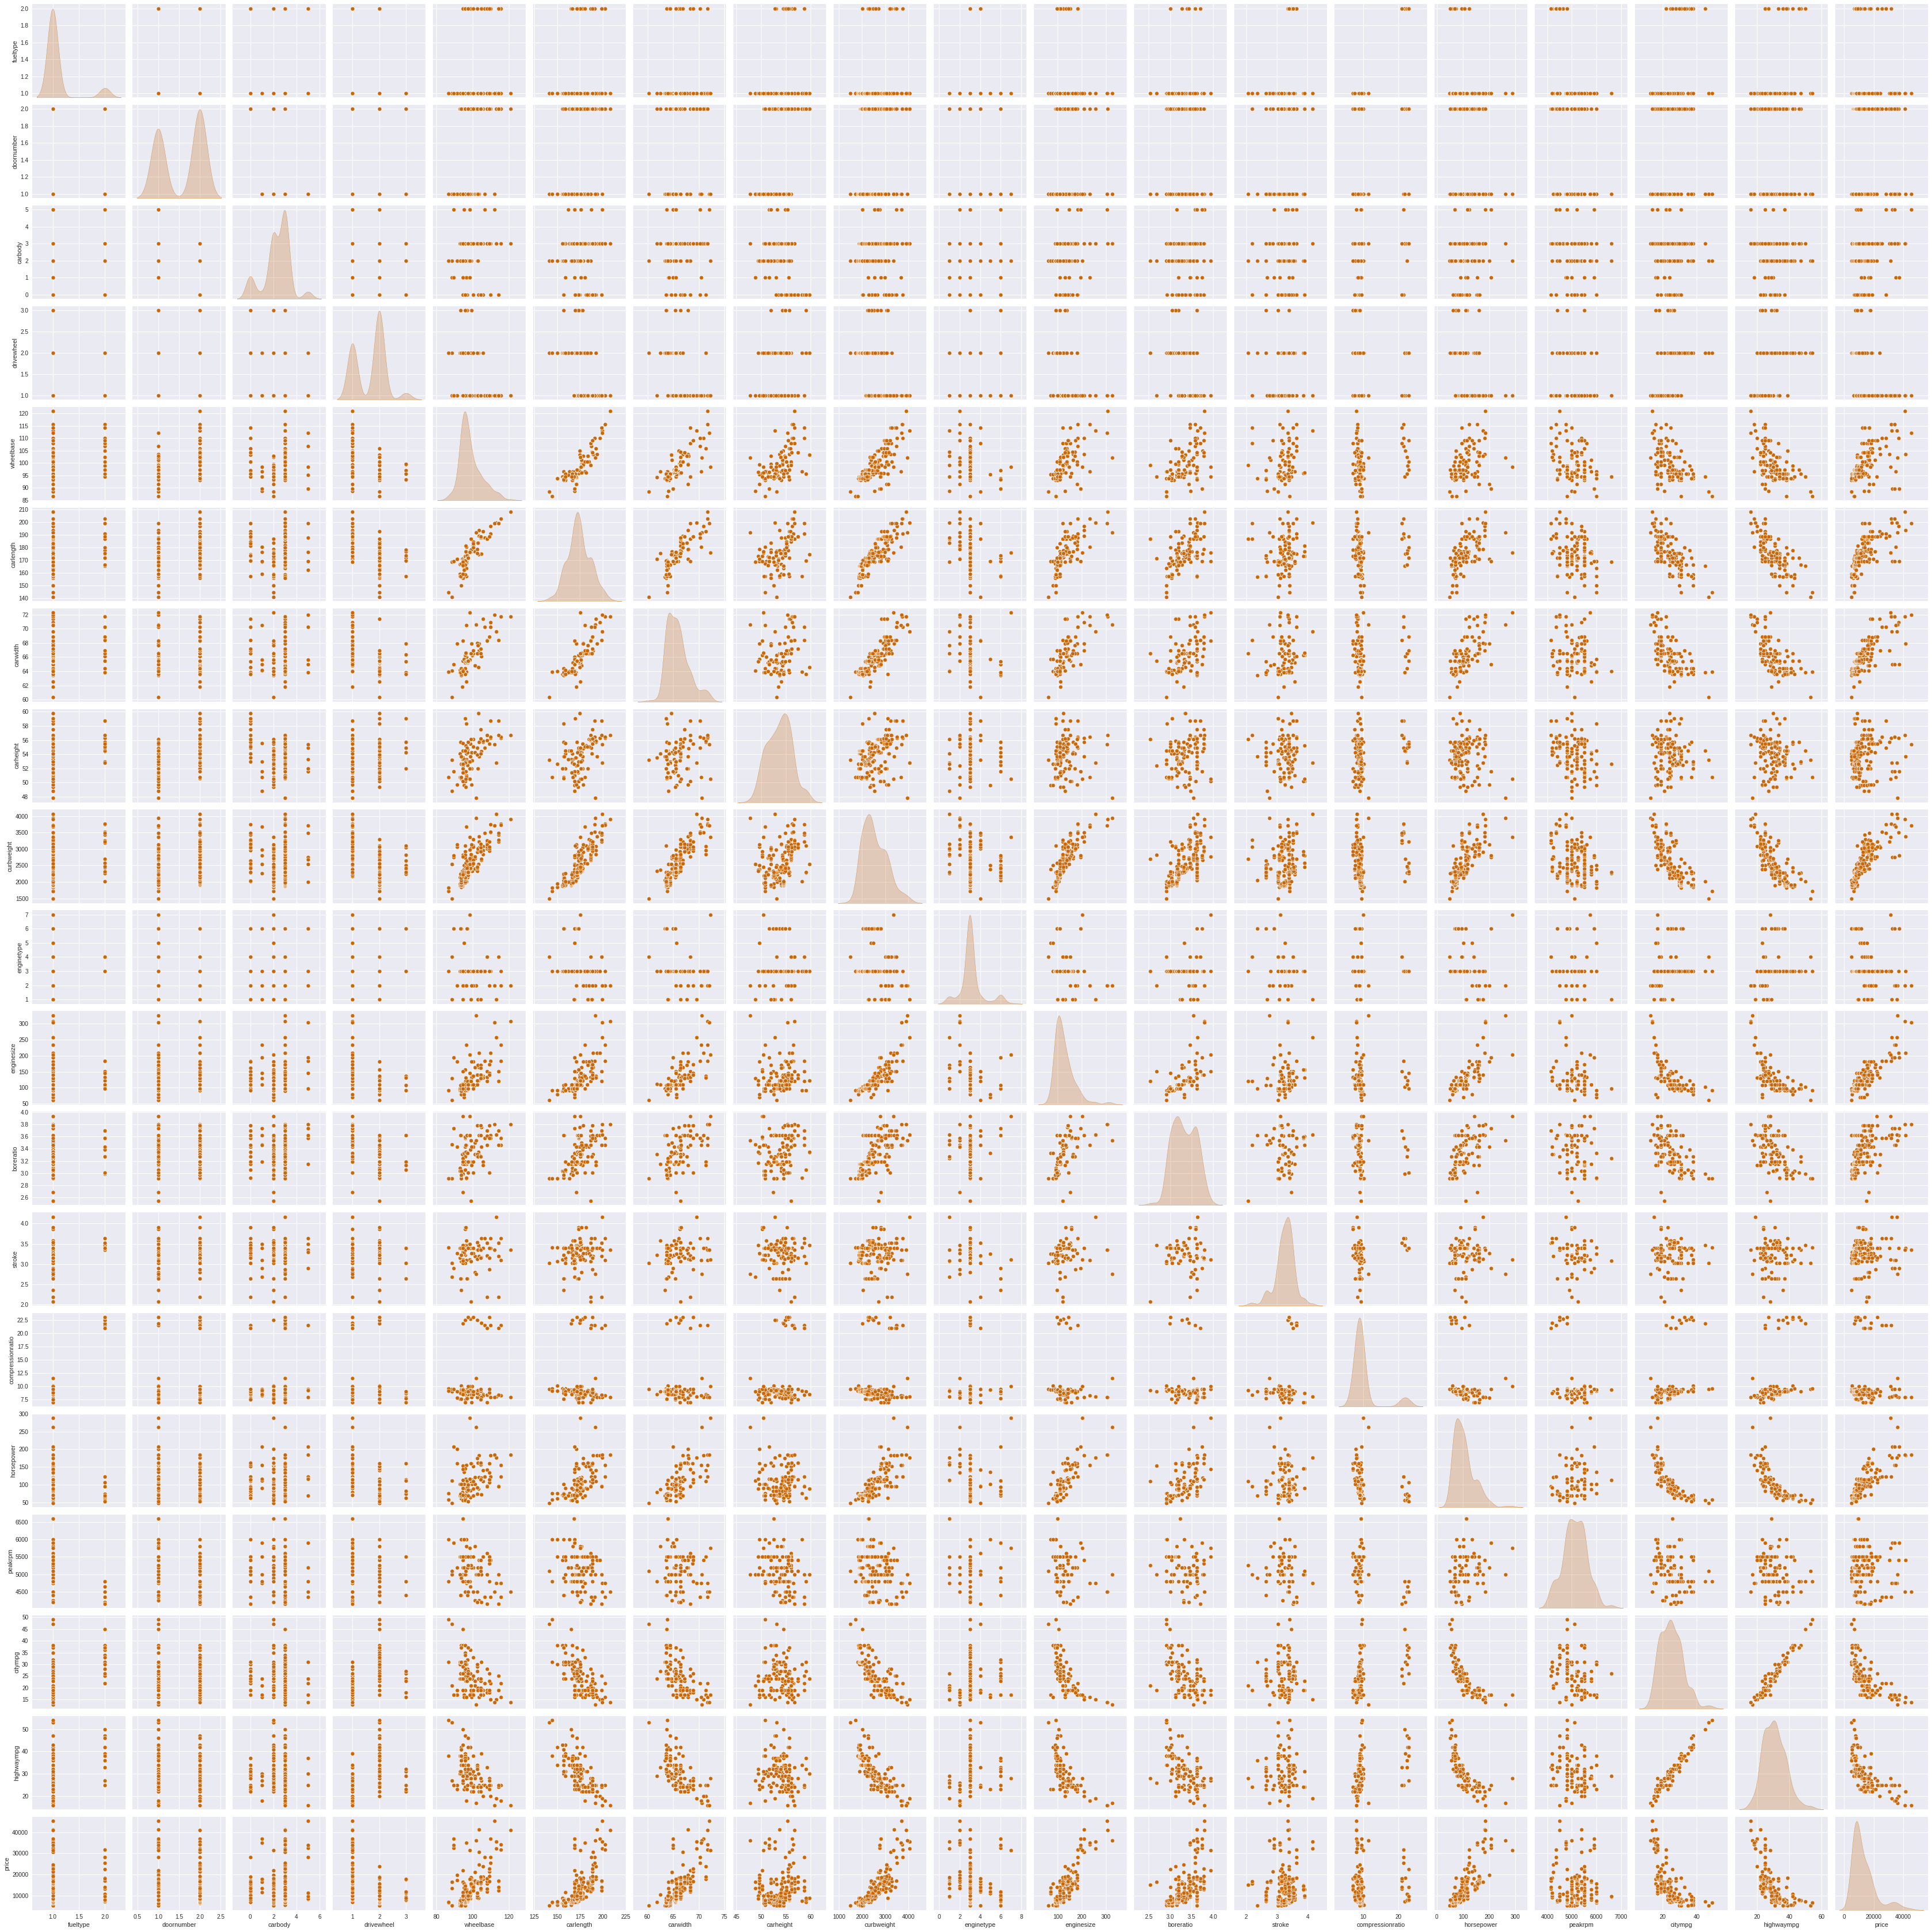

In [39]:
sns.pairplot(car_data,
             x_vars = ['fueltype', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
             y_vars = ['fueltype', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
       diag_kind='kde'
             )

##Data Splits

In [40]:
trainData=car_data.sample(frac=0.8,random_state=0)
testData=car_data.drop(trainData.index)

print(trainData.head())
print(testData.head())

     fueltype  doornumber  carbody  ...  citympg  highwaympg    price
52          1           1      2.0  ...       31          38   6795.0
181         1           2      0.0  ...       19          24  15750.0
5           1           1      3.0  ...       19          25  15250.0
18          1           1      2.0  ...       47          53   5151.0
188         1           2      3.0  ...       26          32   9995.0

[5 rows x 19 columns]
    fueltype  doornumber  carbody  ...  citympg  highwaympg      price
9          1           1      2.0  ...       16          22  17859.167
21         1           1      2.0  ...       37          41   5572.000
25         1           2      3.0  ...       31          38   6692.000
29         1           1      2.0  ...       19          24  12964.000
31         1           1      2.0  ...       31          38   6855.000

[5 rows x 19 columns]


In [41]:
trainFeatures=trainData.copy()
testFeatures=testData.copy()

print(trainFeatures.head())
print(testFeatures.head())

     fueltype  doornumber  carbody  ...  citympg  highwaympg    price
52          1           1      2.0  ...       31          38   6795.0
181         1           2      0.0  ...       19          24  15750.0
5           1           1      3.0  ...       19          25  15250.0
18          1           1      2.0  ...       47          53   5151.0
188         1           2      3.0  ...       26          32   9995.0
..        ...         ...      ...  ...      ...         ...      ...
128         1           1      1.0  ...       17          25  37028.0
34          1           1      2.0  ...       30          34   7129.0
28          1           2      0.0  ...       24          30   8921.0
114         2           2      0.0  ...       25          25  17075.0
151         1           1      2.0  ...       31          38   6338.0

[164 rows x 19 columns]
     fueltype  doornumber  carbody  ...  citympg  highwaympg      price
9           1           1      2.0  ...       16          22  1

In [42]:
trainLabels=trainFeatures.pop('price')
testLabels=testFeatures.pop('price')

print(trainLabels.head())
print(testLabels.head())

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
Name: price, dtype: float64
9     17859.167
21     5572.000
25     6692.000
29    12964.000
31     6855.000
Name: price, dtype: float64


##Model Development

In [43]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

12


In [48]:


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])



In [49]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [50]:
numEpochs = 10000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)


Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
6/6 [==============================] - 0s 8ms/step - loss: 2270.7114 - mae: 2270.7114 - mse: 11365481.0000 - val_loss: 2707.2881 - val_mae: 2707.2881 - val_mse: 14208604.0000
Epoch 7502/10000
6/6 [==============================] - 0s 8ms/step - loss: 2300.1201 - mae: 2300.1201 - mse: 11845099.0000 - val_loss: 2713.3601 - val_mae: 2713.3601 - val_mse: 14211454.0000
Epoch 7503/10000
6/6 [==============================] - 0s 8ms/step - loss: 2298.4692 - mae: 2298.4692 - mse: 11869452.0000 - val_loss: 2709.0510 - val_mae: 2709.0510 - val_mse: 14204859.0000
Epoch 7504/10000
6/6 [==============================] - 0s 8ms/step - loss: 2285.0420 - mae: 2285.0420 - mse: 11480177.0000 - val_loss: 2871.2078 - val_mae: 2871.2078 - val_mse: 14814931.0000
Epoch 7505/10000
6/6 [==============================] - 0s 8ms/step - loss: 2318.4277 - mae: 2318.4277 - mse: 11333769.0000 - val_loss: 2805.4395 - val_mae: 2805.4395 - val_mse: 145

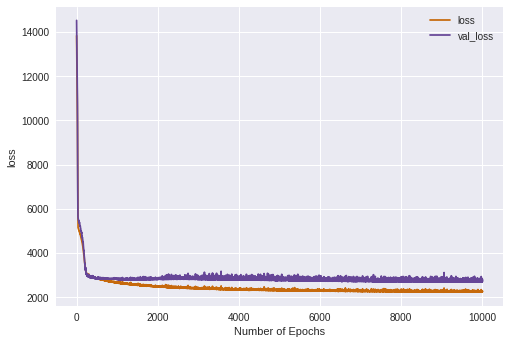

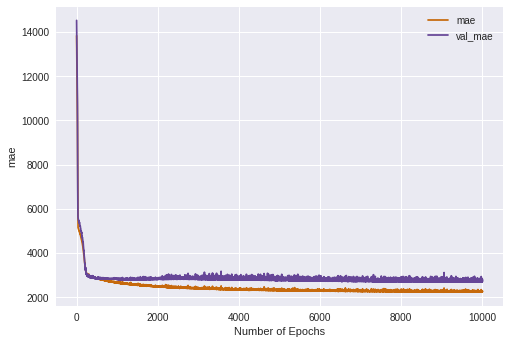

In [51]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [52]:


testPreds = model.predict(testFeatures).flatten()
print(testPreds)



[18589.215   5960.4     7184.4443 18632.623   7180.403   4746.0234
  6742.281  10390.117  32401.613  12645.741  23145.748  23752.8
 28231.32    6679.6377 10075.085  11081.761  18731.324  12624.413
 12624.413  11183.624  22049.627  14513.556  18198.809  26133.61
  8420.086   8990.478  10051.448   8925.911  12065.791  16212.506
 16195.752  16688.498  11379.233  11024.546  22175.996  10405.759
 16372.578  15850.088  15840.794  19437.752  17080.34  ]


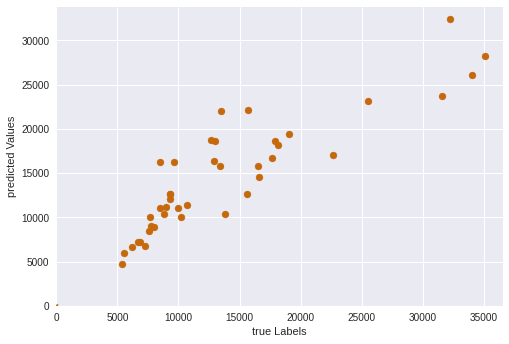

In [53]:


def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)



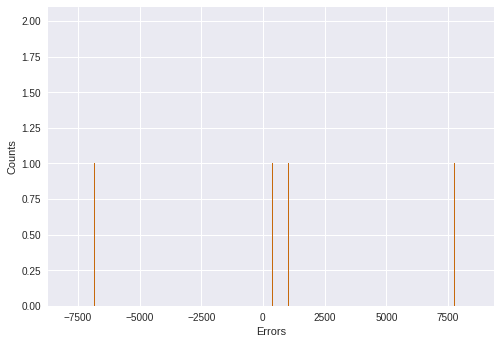

In [54]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

In [55]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [56]:


model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')



In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 565
Trainable params: 565
Non-trainable params: 0
_________________________________________________________________
